  Manufacturer       Model  Engine size Fuel type  Year of manufacture  \
0         Ford      Fiesta          1.0    Petrol                 2002   
1      Porsche  718 Cayman          4.0    Petrol                 2016   
2         Ford      Mondeo          1.6    Diesel                 2014   
3       Toyota        RAV4          1.8    Hybrid                 1988   
4           VW        Polo          1.0    Petrol                 2006   

   Mileage  Price  
0   127300   3074  
1    57850  49704  
2    39190  24072  
3   210814   1705  
4   127869   4101  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  5

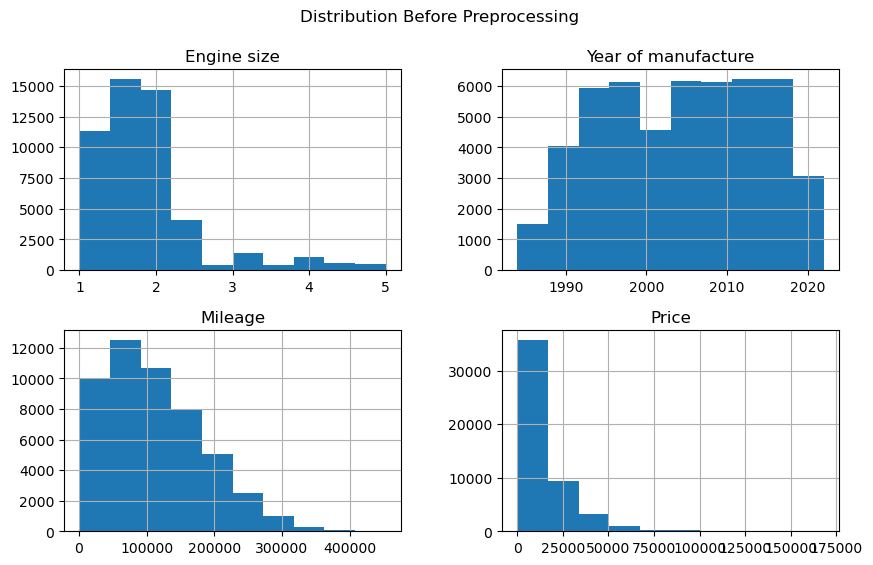

Categorical: Index(['Manufacturer', 'Model', 'Fuel type'], dtype='object')
Numerical: Index(['Engine size', 'Year of manufacture', 'Mileage'], dtype='object')


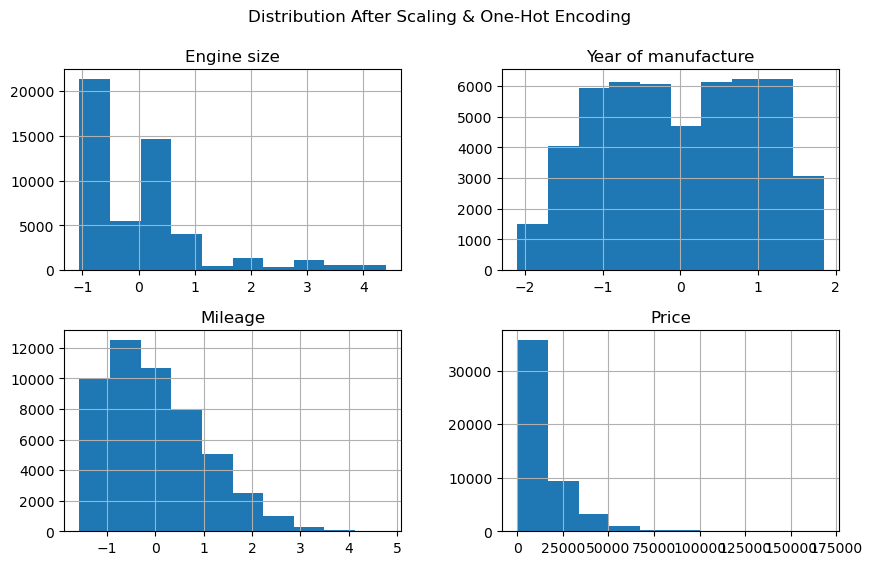

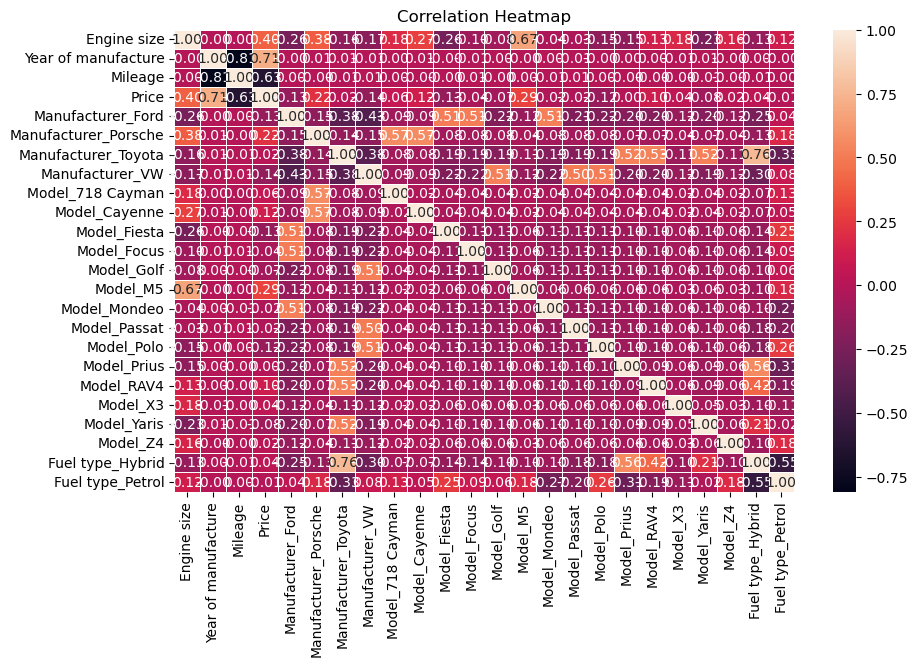

----- Linear Regression -----
R2 Score: 0.7101944353350158
RMSE: 8868.260689884577
----- KNN Regressor -----
R2 Score: 0.9978283808952739
RMSE: 767.674151757111


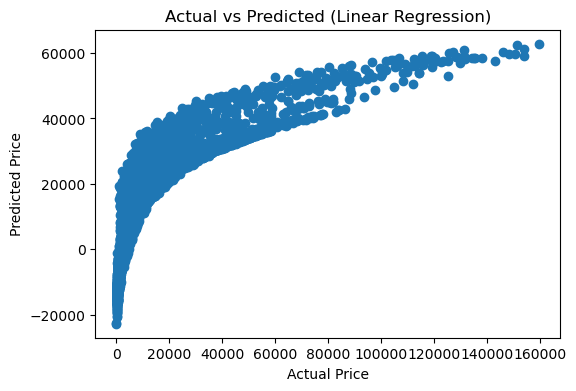

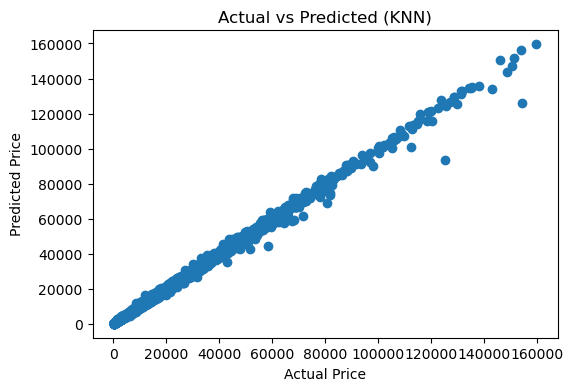

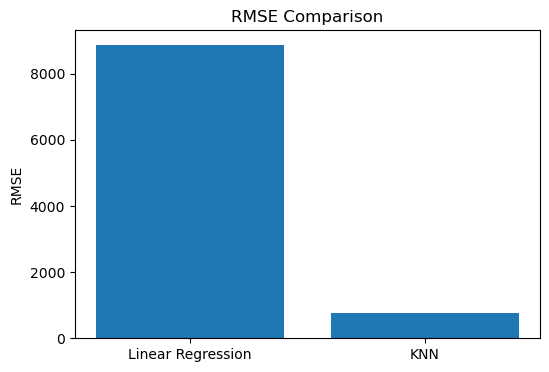

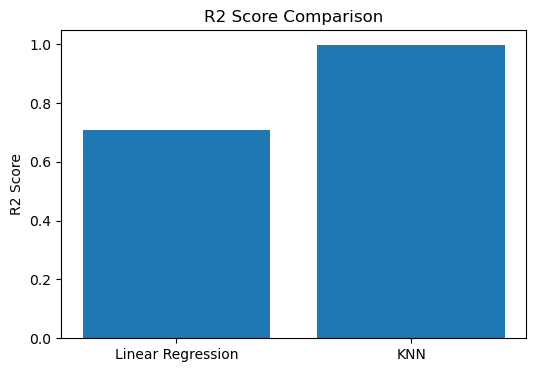

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
import math

# ---------------------------
# LOAD DATA
# ---------------------------
df = pd.read_excel("D:\\CA Predictive\\CA2.xlsx")

print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# ---------------------------
# VISUALIZATION BEFORE PREPROCESSING
# ---------------------------
df.hist(figsize=(10,6))
plt.suptitle("Distribution Before Preprocessing")
plt.show()

# ---------------------------
# SEPARATE COLUMNS
# ---------------------------
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["int64","float64"]).columns.drop("Price")

print("Categorical:", categorical_cols)
print("Numerical:", numerical_cols)

# ---------------------------
# ONE-HOT ENCODING
# ---------------------------
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# ---------------------------
# SCALING
# ---------------------------
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# ---------------------------
# VISUALIZATION AFTER PREPROCESSING
# ---------------------------
df_encoded.hist(figsize=(10,6))
plt.suptitle("Distribution After Scaling & One-Hot Encoding")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# ---------------------------
# TRAIN TEST SPLIT
# ---------------------------
X = df_encoded.drop("Price", axis=1)
y = df_encoded["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# LINEAR REGRESSION
# ---------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

lr_r2 = r2_score(y_test, lr_pred)
lr_rmse = math.sqrt(mean_squared_error(y_test, lr_pred))

print("----- Linear Regression -----")
print("R2 Score:", lr_r2)
print("RMSE:", lr_rmse)

# ---------------------------
# KNN REGRESSOR
# ---------------------------
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

knn_r2 = r2_score(y_test, knn_pred)
knn_rmse = math.sqrt(mean_squared_error(y_test, knn_pred))

print("----- KNN Regressor -----")
print("R2 Score:", knn_r2)
print("RMSE:", knn_rmse)

# ---------------------------
# VISUALIZATIONS AFTER MODELING
# ---------------------------

# ACTUAL vs PREDICTED - LINEAR REGRESSION
plt.figure(figsize=(6,4))
plt.scatter(y_test, lr_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()

# ACTUAL vs PREDICTED - KNN
plt.figure(figsize=(6,4))
plt.scatter(y_test, knn_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted (KNN)")
plt.show()

# MODEL COMPARISON BAR GRAPHS
models = ["Linear Regression", "KNN"]
rmse_values = [lr_rmse, knn_rmse]
r2_values = [lr_r2, knn_r2]

plt.figure(figsize=(6,4))
plt.bar(models, rmse_values)
plt.title("RMSE Comparison")
plt.ylabel("RMSE")
plt.show()

plt.figure(figsize=(6,4))
plt.bar(models, r2_values)
plt.title("R2 Score Comparison")
plt.ylabel("R2 Score")
plt.show()
